# Import Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import joblib

# Load the Iris dataset


In [60]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, names=names)

# Separate features (X) and target variable (y)


In [61]:
X = iris_data.drop('class', axis=1)
y = iris_data['class']

# Standardize the features


In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering


In [63]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=0)

# Add cluster labels to the original dataset


In [64]:
iris_data['cluster'] = kmeans.labels_

# Visualize the results using PCA for dimensionality reduction


In [65]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters


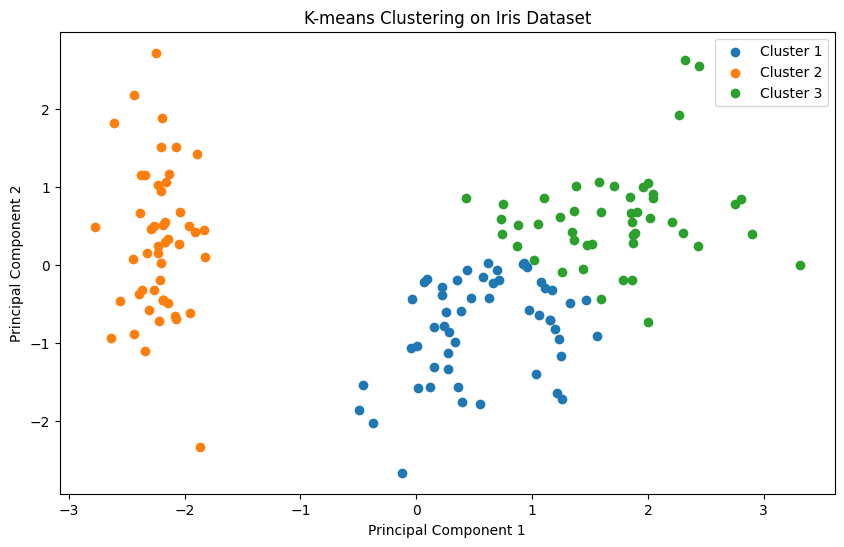

In [66]:
plt.figure(figsize=(10, 6))

for i in range(3):
    cluster_points = X_pca[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
#             s=200, marker='X', c='red', label='Centroids')

plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()